# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [15]:
fitbit=pd.read_csv('Fitbit2.csv')
fitbit.head(30)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [20]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

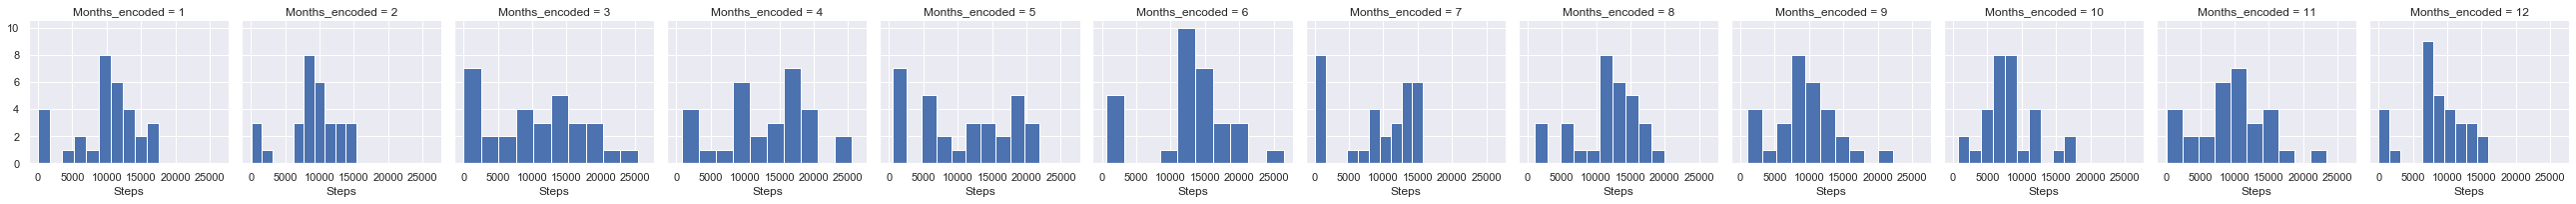

In [74]:
graphic = sns.FacetGrid(data=fitbit, col='Months_encoded')
graphic.map(plt.hist,'Steps');

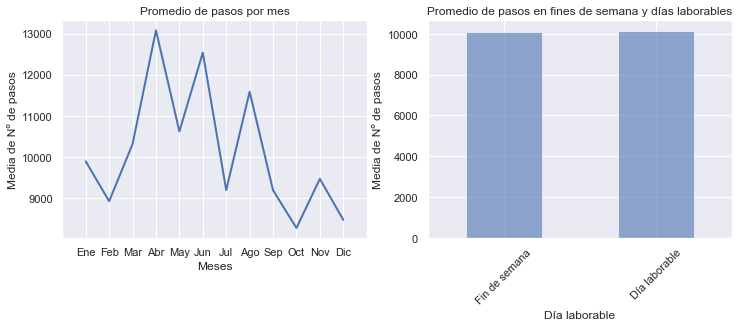

In [45]:
steps_per_month = fitbit['Steps'].groupby(fitbit['Months_encoded']).mean()
steps_per_day = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).mean()

fig,ax = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
# plt.sca: setea los ejes al valor que introduzcamos como parámetro.
plt.sca(ax[0])
steps_per_month.plot(kind = 'line',linewidth=2)
plt.ylabel('Media de Nº de pasos')
plt.xlabel('Meses')
plt.title('Promedio de pasos por mes')
plt.xticks(list(range(14)),['','Ene','Feb','Mar','Abr', \
                            'May','Jun','Jul','Ago', \
                            'Sep','Oct','Nov','Dic', '']);

plt.sca(ax[1])
steps_per_day.plot(kind = 'bar', alpha=0.6)
plt.ylabel('Media de Nº de pasos')
plt.xlabel('Día laborable')
plt.title('Promedio de pasos en fines de semana y días laborables')
plt.xticks(list(range(2)),['Fin de semana', 'Día laborable'], rotation=45);

A continuación decidimos representar más estadísticos (por curiosidad)

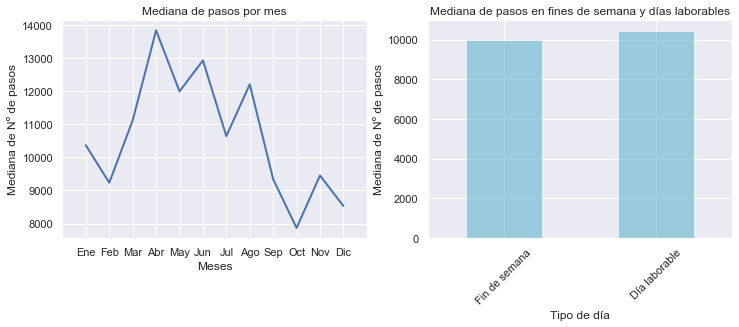

In [128]:
median_steps_per_month = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()
median_steps_per_day = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median()

fig,ax = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
# plt.sca: setea los ejes al valor que introduzcamos como parámetro.
plt.sca(ax[0])
median_steps_per_month.plot(kind = 'line',linewidth=2)
plt.ylabel('Mediana de Nº de pasos')
plt.xlabel('Meses')
plt.title('Mediana de pasos por mes')
plt.xticks(list(range(14)),['','Ene','Feb','Mar','Abr', \
                            'May','Jun','Jul','Ago', \
                            'Sep','Oct','Nov','Dic', '']);

plt.sca(ax[1])
median_steps_per_day.plot(kind = 'bar', alpha=0.6, color='c')
plt.ylabel('Mediana de Nº de pasos')
plt.xlabel('Tipo de día')
plt.title('Mediana de pasos en fines de semana y días laborables')
plt.xticks(list(range(2)),['Fin de semana', 'Día laborable'], rotation=45);

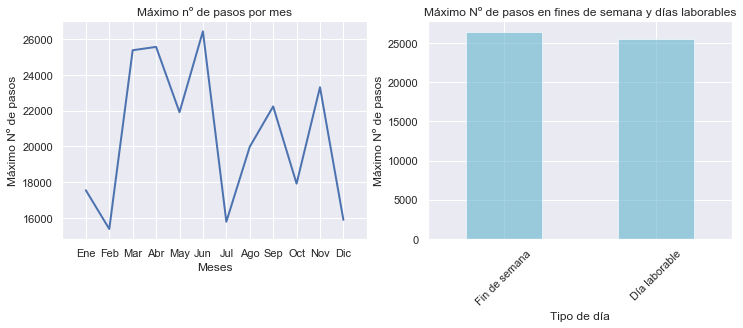

In [61]:
max_steps_per_month = fitbit['Steps'].groupby(fitbit['Months_encoded']).max()
max_steps_per_day = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).max()

fig,ax = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
# plt.sca: setea los ejes al valor que introduzcamos como parámetro.
plt.sca(ax[0])
max_steps_per_month.plot(kind = 'line',linewidth=2)
plt.ylabel('Máximo Nº de pasos')
plt.xlabel('Meses')
plt.title('Máximo nº de pasos por mes')
plt.xticks(list(range(14)),['','Ene','Feb','Mar','Abr', \
                            'May','Jun','Jul','Ago', \
                            'Sep','Oct','Nov','Dic', '']);

plt.sca(ax[1])
max_steps_per_day.plot(kind = 'bar', alpha=0.6, color='c')
plt.ylabel('Máximo Nº de pasos')
plt.xlabel('Tipo de día')
plt.title('Máximo Nº de pasos en fines de semana y días laborables')
plt.xticks(list(range(2)),['Fin de semana', 'Día laborable'], rotation=45);

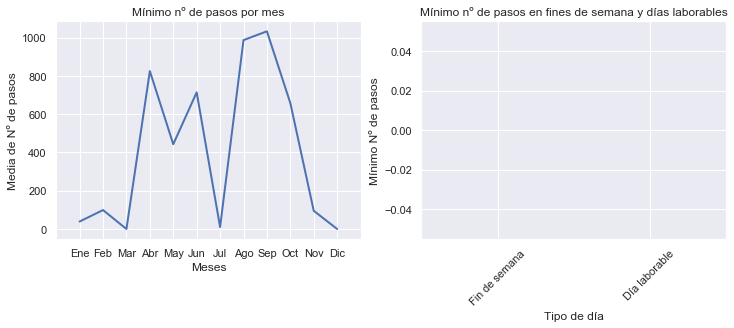

In [60]:
min_steps_per_month = fitbit['Steps'].groupby(fitbit['Months_encoded']).min()
min_steps_per_day = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).min()

fig,ax = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
# plt.sca: setea los ejes al valor que introduzcamos como parámetro.
plt.sca(ax[0])
min_steps_per_month.plot(kind = 'line',linewidth=2)
plt.ylabel('Media de Nº de pasos')
plt.xlabel('Meses')
plt.title('Mínimo nº de pasos por mes')
plt.xticks(list(range(14)),['','Ene','Feb','Mar','Abr', \
                            'May','Jun','Jul','Ago', \
                            'Sep','Oct','Nov','Dic', '']);

plt.sca(ax[1])
min_steps_per_day.plot(kind = 'bar', alpha=0.6)
plt.ylabel('Mínimo Nº de pasos')
plt.xlabel('Tipo de día')
plt.title('Mínimo nº de pasos en fines de semana y días laborables')
plt.xticks(list(range(2)),['Fin de semana', 'Día laborable'], rotation=45);

## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

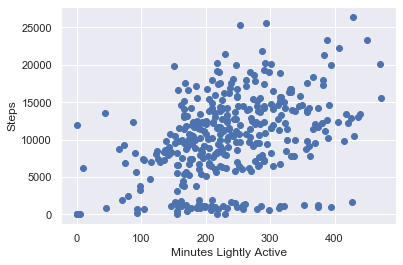

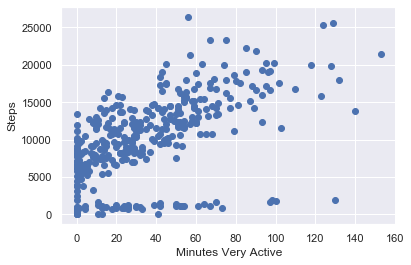

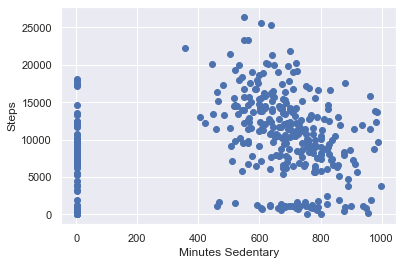

In [126]:
minutes = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for item in minutes:
    plt.scatter(fitbit[item], fitbit['Steps']);
    plt.xlabel(item)
    plt.ylabel('Steps')
    plt.show();


En base al resultado anterior, definimos una función :)

### Función `get_scatter_plot` :   

#### Parámetros de entrada:
* **Df**: dataframe
* **columns**: lista de columnas sobre las que queremos representar un scatterplot
* **col**: columna que servirá de eje y
* **colour**: color html en el que representaremos la gráfica
* **visibility**: grado de transparencia del punto

#### Resultado:
Tantos gráficos de tipo scatter como elementos existan en la lista de columnas con el color y visibilidad marcados, siendo nuestros valores del eje x cada uno de los elemento de la lista `columns` y los valores del eje y son los dados por la serie df[col]



In [127]:
def get_scatter_plot(df, colums, col, colour, visibility):
    for item in colums:
        plt.scatter(df[item], df[col], color=colour, alpha=visibility);
        plt.xlabel(item)
        plt.ylabel(col)
        plt.show();

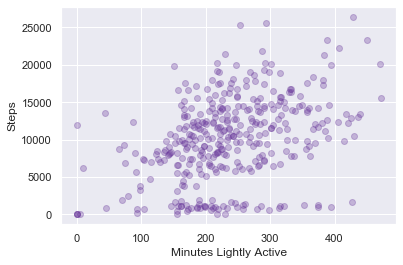

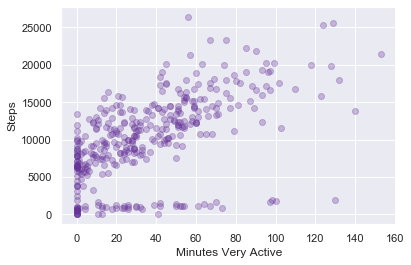

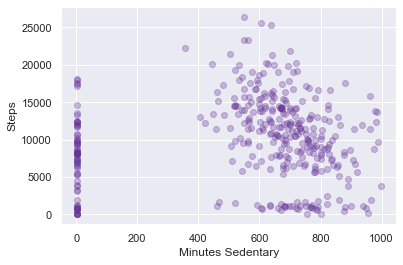

In [125]:
minutes = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
get_scatter_plot(fitbit, minutes, 'Steps', 'rebeccapurple', 0.3)